### Project 1 Data Analysis
* Understand the relationship between income and confirmed cases of corona. 

-----

### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
from scipy.stats import linregress
from sklearn import datasets
import statsmodels.api as sm


# File to Load 
file_to_load1 = "lapi1119.csv"
file_to_load2 = "us-counties.csv"

* Display the total number of players


In [35]:
# Read Purchasing File and store into Pandas data frame


income_data_df = pd.read_csv(file_to_load1)
county_data_df = pd.read_csv(file_to_load2)
combined_df= pd.merge(county_data_df,income_data_df, on = "county")
combined_df['2018'].dtype


dtype('float64')

In [36]:
## County count
county_count = len(combined_df["county"].unique())
county_count

 #get the range of data dates 
print(min(combined_df['date']))
print(max(combined_df['date']))


2020-01-21
2020-04-17


## Corona Cases Analysis (Total)

* Run basic calculations to obtain number of unique cases.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [22]:
#group data by cases confirmed on the most recent day
grouped_date_df = combined_df.groupby(["date"])
date_county_df = combined_df["date"].nunique()

grouped_date_df.head(20)


,date,county,state_x,fips,cases,deaths,state_y,2016,2017,2018,rank in State,% change 2017,% change 2018,rank 2018
0,2020-01-21,Snohomish,Washington,53061.0,1,0,Washington,50344.0,52453.0,55888.0,4,4.2,6.5,2
1,2020-01-22,Snohomish,Washington,53061.0,1,0,Washington,50344.0,52453.0,55888.0,4,4.2,6.5,2
2,2020-01-23,Snohomish,Washington,53061.0,1,0,Washington,50344.0,52453.0,55888.0,4,4.2,6.5,2
3,2020-01-24,Snohomish,Washington,53061.0,1,0,Washington,50344.0,52453.0,55888.0,4,4.2,6.5,2
4,2020-01-25,Snohomish,Washington,53061.0,1,0,Washington,50344.0,52453.0,55888.0,4,4.2,6.5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,2020-03-03,Bexar,Texas,48029.0,11,0,Texas,42294.0,43878.0,46058.0,74,3.7,5.0,117
2976,2020-03-04,Bexar,Texas,48029.0,11,0,Texas,42294.0,43878.0,46058.0,74,3.7,5.0,117
2977,2020-03-05,Bexar,Texas,48029.0,11,0,Texas,42294.0,43878.0,46058.0,74,3.7,5.0,117
2978,2020-03-06,Bexar,Texas,48029.0,11,0,Texas,42294.0,43878.0,46058.0,74,3.7,5.0,117


## Cases Confirmed

* Understand the amount of cases by date and county




In [23]:
sort_county_df = combined_df.sort_values(by =['2018', 'date'])
 
print("Contents of a Sorted Dataframe based on multiple columns '2018 Income per Capita' & 'date' : ")
print(sort_county_df)


Contents of a Sorted Dataframe based on multiple columns '2018 Income per Capita' & 'date' : 
              date   county   state_x     fips  cases  deaths   state_y  \
258863  2020-03-19  Crowley  Colorado   8025.0      1       1  Colorado   
258864  2020-03-20  Crowley  Colorado   8025.0      1       1  Colorado   
258865  2020-03-21  Crowley  Colorado   8025.0      1       1  Colorado   
258866  2020-03-22  Crowley  Colorado   8025.0      1       1  Colorado   
258867  2020-03-23  Crowley  Colorado   8025.0      1       1  Colorado   
...            ...      ...       ...      ...    ...     ...       ...   
181462  2020-04-15    Teton   Wyoming  56039.0     59       0       NaN   
181465  2020-04-16    Teton     Idaho  16081.0      6       0       NaN   
181468  2020-04-16    Teton   Wyoming  56039.0     59       0       NaN   
181471  2020-04-17    Teton     Idaho  16081.0      7       0       NaN   
181474  2020-04-17    Teton   Wyoming  56039.0     61       0       NaN   

     


## Take a look at the total cases by county for the most recent date 


* Create a summary data frame to hold the data for the most recent confirmed cases of corona on 4/17/20



In [24]:
max_date_df = combined_df["date"]== (max(combined_df['date']))
max_date_df
recent_date = combined_df[max_date_df]
recent_date.head(20)


,date,county,state_x,fips,cases,deaths,state_y,2016,2017,2018,rank in State,% change 2017,% change 2018,rank 2018
87,2020-04-17,Snohomish,Washington,53061.0,2055,87,Washington,50344.0,52453.0,55888.0,4,4.2,6.5,2
394,2020-04-17,Cook,Georgia,13075.0,12,1,Georgia,29733.0,31086.0,32524.0,119,4.6,4.6,38
395,2020-04-17,Cook,Georgia,13075.0,12,1,NaN,56961.0,59046.0,62205.0,4,3.7,5.4,48
396,2020-04-17,Cook,Georgia,13075.0,12,1,NaN,50705.0,52629.0,55319.0,16,3.8,5.1,35
397,2020-04-17,Cook,Illinois,17031.0,19391,760,Georgia,29733.0,31086.0,32524.0,119,4.6,4.6,38
398,2020-04-17,Cook,Illinois,17031.0,19391,760,NaN,56961.0,59046.0,62205.0,4,3.7,5.4,48
399,2020-04-17,Cook,Illinois,17031.0,19391,760,NaN,50705.0,52629.0,55319.0,16,3.8,5.1,35
2092,2020-04-17,Orange,California,6059.0,1501,28,California,63086.0,65709.0,69268.0,10,4.2,5.4,19
2093,2020-04-17,Orange,California,6059.0,1501,28,NaN,40750.0,42776.0,44647.0,22,5.0,4.4,24
2094,2020-04-17,Orange,California,6059.0,1501,28,NaN,34191.0,36862.0,38124.0,80,7.8,3.4,79


In [26]:
#drop dupes for the recent date data 
plot_data_no_dupes= recent_date.drop_duplicates(subset="county", keep="first")
plot_data_no_dupes



,date,county,state_x,fips,cases,deaths,state_y,2016,2017,2018,rank in State,% change 2017,% change 2018,rank 2018
87,2020-04-17,Snohomish,Washington,53061.0,2055,87,Washington,50344.0,52453.0,55888.0,4,4.2,6.5,2
394,2020-04-17,Cook,Georgia,13075.0,12,1,Georgia,29733.0,31086.0,32524.0,119,4.6,4.6,38
2092,2020-04-17,Orange,California,6059.0,1501,28,California,63086.0,65709.0,69268.0,10,4.2,5.4,19
2222,2020-04-17,Maricopa,Arizona,4013.0,2404,69,Arizona,43825.0,45667.0,47694.0,2,4.2,4.4,7
2305,2020-04-17,Los Angeles,California,6037.0,11391,495,California,57127.0,59058.0,62224.0,15,3.4,5.4,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321375,2020-04-17,Aitkin,Minnesota,27001.0,1,0,Minnesota,36664.0,37916.0,39780.0,84,3.4,4.9,39
321376,2020-04-17,Red Willow,Nebraska,31145.0,1,0,Nebraska,43243.0,43499.0,46270.0,61,0.6,6.4,34
321377,2020-04-17,Haskell,Oklahoma,40061.0,1,0,Kansas,64115.0,53854.0,52783.0,20,-16.0,-2.0,105
321380,2020-04-17,Woods,Oklahoma,40151.0,1,0,Oklahoma,41442.0,40195.0,42890.0,23,-3.0,6.7,12


## Check County Data 

* Check to make sure county data aligns with state

In [33]:
#find max and min of 2018 income to be able to create individual scatter plots across time 
max_income_df = combined_df["2018"]== (max(combined_df['2018']))
max_income_df
income_data = combined_df[max_income_df]
income_data.head(20)



,date,county,state_x,fips,cases,deaths,state_y,2016,2017,2018,rank in State,% change 2017,% change 2018,rank 2018
181279,2020-03-14,Teton,Idaho,16081.0,1,0,NaN,214020.0,227753.0,251728.0,1,6.4,10.5,2
181282,2020-03-15,Teton,Idaho,16081.0,1,0,NaN,214020.0,227753.0,251728.0,1,6.4,10.5,2
181285,2020-03-16,Teton,Idaho,16081.0,1,0,NaN,214020.0,227753.0,251728.0,1,6.4,10.5,2
181288,2020-03-17,Teton,Idaho,16081.0,1,0,NaN,214020.0,227753.0,251728.0,1,6.4,10.5,2
181291,2020-03-18,Teton,Idaho,16081.0,1,0,NaN,214020.0,227753.0,251728.0,1,6.4,10.5,2
181294,2020-03-18,Teton,Wyoming,56039.0,1,0,NaN,214020.0,227753.0,251728.0,1,6.4,10.5,2
181297,2020-03-19,Teton,Idaho,16081.0,1,0,NaN,214020.0,227753.0,251728.0,1,6.4,10.5,2
181300,2020-03-19,Teton,Wyoming,56039.0,1,0,NaN,214020.0,227753.0,251728.0,1,6.4,10.5,2
181303,2020-03-20,Teton,Idaho,16081.0,1,0,NaN,214020.0,227753.0,251728.0,1,6.4,10.5,2
181306,2020-03-20,Teton,Wyoming,56039.0,2,0,NaN,214020.0,227753.0,251728.0,1,6.4,10.5,2


## Scatter plots

* Scatter plot for all income v cases 



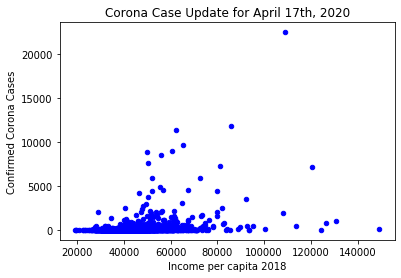

In [29]:
case_plot = plot_data_no_dupes.plot.scatter(x='2018',y='cases',c='Blue')
plt.xlabel('Income per capita 2018')
plt.ylabel('Confirmed Corona Cases')
plt.title('Corona Case Update for April 17th, 2020')
plt.show()


## Regression Graphs

* Use scatter plot to add regression lines 



R squared: 0.10118349600866594
The correlation between income per capita and confirmed corona cases is 0.32


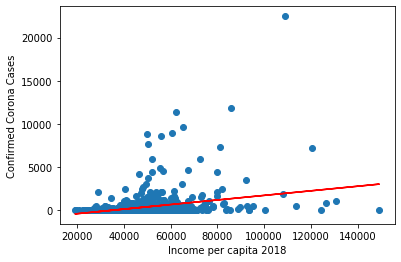

In [32]:
income= plot_data_no_dupes['2018']
cases= plot_data_no_dupes['cases']
correlation= st.pearsonr(income,cases)
(slope, intercept, rvalue, pvalue, stderr) = linregress(income,cases)
regress_values = income * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(income,cases)
plt.plot(income,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.xlabel('Income per capita 2018')
plt.ylabel('Confirmed Corona Cases')
# Print r square value
print(f"R squared: {rvalue**2}")
print(f"The correlation between income per capita and confirmed corona cases is {round(correlation[0],2)}")
plt.show()

In [41]:
X = plot_data_no_dupes["2018"]
y = plot_data_no_dupes["cases"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.077
Model:                            OLS   Adj. R-squared (uncentered):              0.076
Method:                 Least Squares   F-statistic:                              129.1
Date:                Thu, 23 Apr 2020   Prob (F-statistic):                    8.60e-29
Time:                        17:17:56   Log-Likelihood:                         -12956.
No. Observations:                1558   AIC:                                  2.591e+04
Df Residuals:                    1557   BIC:                                  2.592e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
2018           0.0062      0.001     11.361      0.000       0.005       0.007
==============================================================================
Omnibus:                     2736.008   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2543148.876
Skew:                          11.992   Prob(JB):                         0.00
Kurtosis:                     199.470   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
largest_income_df = combined_df["2018"]== (max(combined_df['2018']))
max_income_df
income_data = combined_df[max_income_df]
income_data.head(20)